In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

In [2]:
returns = pd.read_excel("all_data/returns.xlsx")
gw = pd.read_excel("all_data/weights_garch.xlsx")
hw = pd.read_excel("all_data/weights_hist.xlsx")

In [3]:
def clean_data(df):
    df = df.set_index('Date')
    df = df.dropna()
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    return df

df = clean_data(returns)

(<Axes: title={'center': 'Portfolio Returns'}, xlabel='Date'>,
 Text(0.5, 1.0, 'Portfolio Returns'))

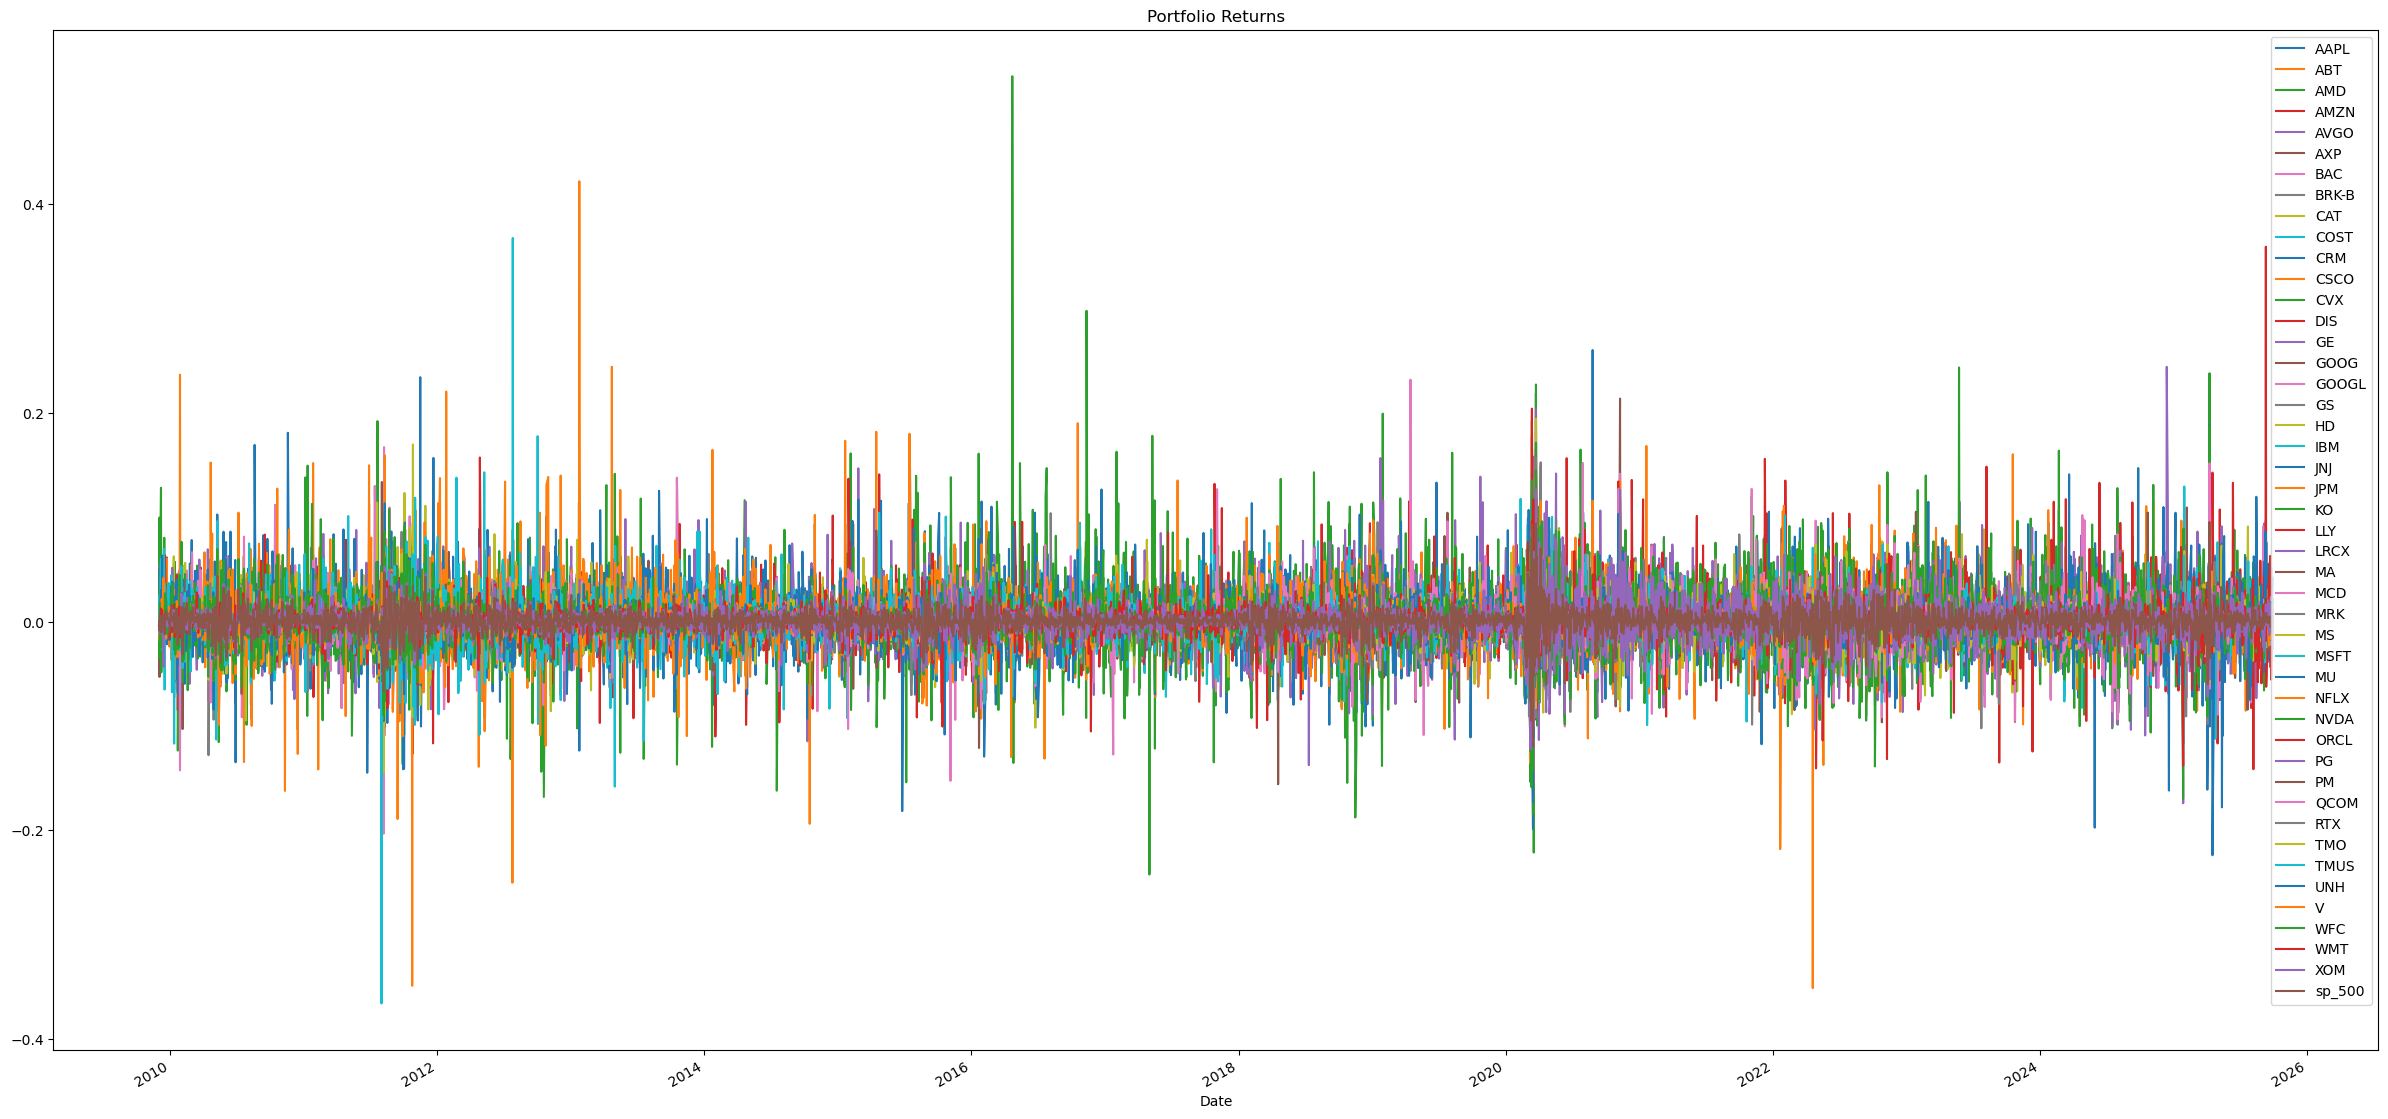

In [4]:
df.plot(figsize=(30, 15)), plt.title('Portfolio Returns')

(<Axes: title={'center': 'Cumulative Portfolio Returns'}, xlabel='Date'>,
 Text(0.5, 1.0, 'Cumulative Portfolio Returns'))

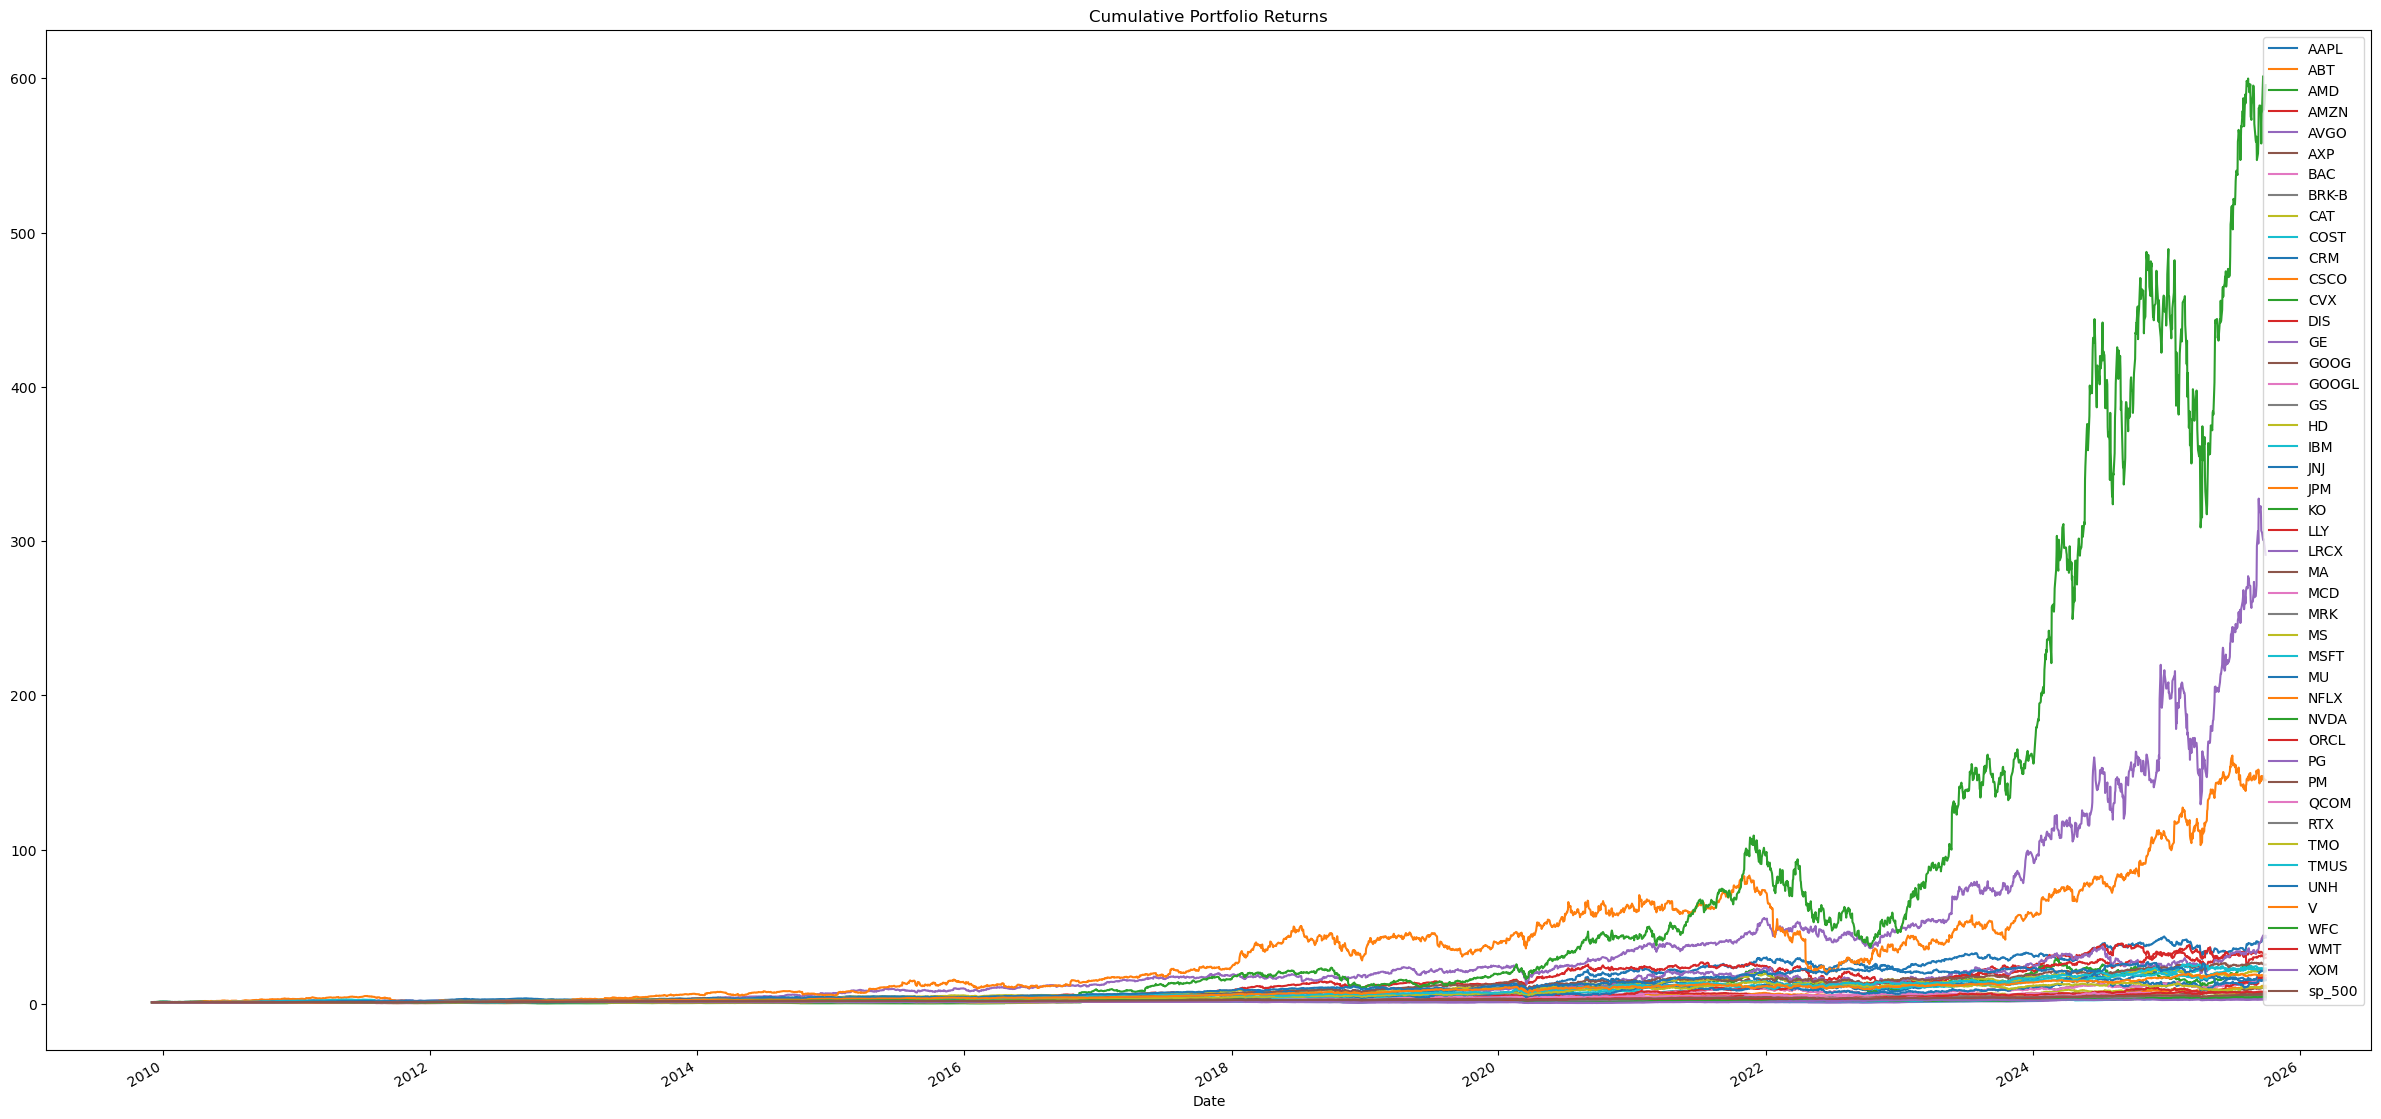

In [5]:
df_cum = (1 + df).cumprod()
df_cum.plot(figsize=(30, 15)), plt.title('Cumulative Portfolio Returns')

In [6]:
print(len(returns.columns))
print(returns.columns)
print(len(hw.columns))
print(hw.columns)
print(len(gw.columns))
print(gw.columns)  

47
Index(['Date', 'AAPL', 'ABT', 'AMD', 'AMZN', 'AVGO', 'AXP', 'BAC', 'BRK-B',
       'CAT', 'COST', 'CRM', 'CSCO', 'CVX', 'DIS', 'GE', 'GOOG', 'GOOGL', 'GS',
       'HD', 'IBM', 'JNJ', 'JPM', 'KO', 'LLY', 'LRCX', 'MA', 'MCD', 'MRK',
       'MS', 'MSFT', 'MU', 'NFLX', 'NVDA', 'ORCL', 'PG', 'PM', 'QCOM', 'RTX',
       'TMO', 'TMUS', 'UNH', 'V', 'WFC', 'WMT', 'XOM', 'sp_500'],
      dtype='object')
46
Index(['Date', 'AAPL', 'ABT', 'AMD', 'AMZN', 'AVGO', 'AXP', 'BAC', 'BRK-B',
       'CAT', 'COST', 'CRM', 'CSCO', 'CVX', 'DIS', 'GE', 'GOOG', 'GOOGL', 'GS',
       'HD', 'IBM', 'JNJ', 'JPM', 'KO', 'LLY', 'LRCX', 'MA', 'MCD', 'MRK',
       'MS', 'MSFT', 'MU', 'NFLX', 'NVDA', 'ORCL', 'PG', 'PM', 'QCOM', 'RTX',
       'TMO', 'TMUS', 'UNH', 'V', 'WFC', 'WMT', 'XOM'],
      dtype='object')
46
Index(['Date', 'AAPL', 'ABT', 'AMD', 'AMZN', 'AVGO', 'AXP', 'BAC', 'BRK-B',
       'CAT', 'COST', 'CRM', 'CSCO', 'CVX', 'DIS', 'GE', 'GOOG', 'GOOGL', 'GS',
       'HD', 'IBM', 'JNJ', 'JPM', 'KO', 'LLY', 'LRC

In [7]:
hw.head(1)

,Date,AAPL,ABT,AMD,AMZN,AVGO,AXP,BAC,BRK-B,CAT,...,PM,QCOM,RTX,TMO,TMUS,UNH,V,WFC,WMT,XOM
0,03-2012,0.061585,0.011602,0.057022,0.001,0.001,0.001,0.055492,0.001,0.061573,...,0.001,0.001,0.001,0.037028,0.05846,0.001,0.001,0.075279,0.001,0.001


In [8]:
gw.head(1)

,Date,AAPL,ABT,AMD,AMZN,AVGO,AXP,BAC,BRK-B,CAT,...,PM,QCOM,RTX,TMO,TMUS,UNH,V,WFC,WMT,XOM
0,03-2012,0.069528,0.001,0.061016,0.001,0.001,0.001,0.060361,0.001,0.066676,...,0.001,0.001,0.001,0.001,0.001,0.069757,0.001,0.065522,0.001,0.001


In [9]:
returns = returns.drop('sp_500', axis=1)

# Convert Date to datetime
returns['Date'] = pd.to_datetime(returns['Date'])

# Filter dates from 01/11/2011
returns = returns[returns['Date'] >= '2012-03-01']

In [10]:
returns.head()  

,Date,AAPL,ABT,AMD,AMZN,AVGO,AXP,BAC,BRK-B,CAT,...,PM,QCOM,RTX,TMO,TMUS,UNH,V,WFC,WMT,XOM
565,2012-03-01,0.003743,0.012542,0.021769,0.001948,-0.007711,0.012857,0.018821,0.004207,-0.007180,...,0.008502,0.006915,0.003458,0.009890,0.055340,0.007250,0.006960,0.007990,-0.004401,0.003816
566,2012-03-02,0.001304,0.001221,-0.006658,-0.004110,-0.019293,-0.010827,0.001232,-0.006220,-0.007937,...,0.003799,-0.002875,0.004515,0.001224,-0.028519,-0.002679,-0.008704,-0.008244,0.003230,-0.005758
567,2012-03-05,-0.022048,-0.001916,-0.052279,0.005354,-0.031421,-0.000377,-0.019680,0.011240,-0.021335,...,0.010290,-0.005126,-0.014785,-0.012052,-0.056818,-0.014327,0.000689,-0.009910,0.006609,0.007877
568,2012-03-06,-0.005439,-0.016236,-0.024045,0.004604,-0.003949,-0.023221,-0.032622,-0.008842,-0.037787,...,-0.015921,-0.008855,-0.022812,-0.019979,-0.031124,-0.010538,-0.012044,-0.027769,-0.007240,-0.013217
569,2012-03-07,0.000811,-0.001597,0.039130,0.014799,0.012461,0.010244,0.040208,0.004460,0.022184,...,0.000119,0.018843,0.014498,-0.003247,0.020725,-0.001286,0.006966,0.009964,0.015093,-0.000350


In [11]:
print(len(returns.columns))
print(returns.columns)
print(len(hw.columns))
print(hw.columns)
print(len(gw.columns))
print(gw.columns)

46
Index(['Date', 'AAPL', 'ABT', 'AMD', 'AMZN', 'AVGO', 'AXP', 'BAC', 'BRK-B',
       'CAT', 'COST', 'CRM', 'CSCO', 'CVX', 'DIS', 'GE', 'GOOG', 'GOOGL', 'GS',
       'HD', 'IBM', 'JNJ', 'JPM', 'KO', 'LLY', 'LRCX', 'MA', 'MCD', 'MRK',
       'MS', 'MSFT', 'MU', 'NFLX', 'NVDA', 'ORCL', 'PG', 'PM', 'QCOM', 'RTX',
       'TMO', 'TMUS', 'UNH', 'V', 'WFC', 'WMT', 'XOM'],
      dtype='object')
46
Index(['Date', 'AAPL', 'ABT', 'AMD', 'AMZN', 'AVGO', 'AXP', 'BAC', 'BRK-B',
       'CAT', 'COST', 'CRM', 'CSCO', 'CVX', 'DIS', 'GE', 'GOOG', 'GOOGL', 'GS',
       'HD', 'IBM', 'JNJ', 'JPM', 'KO', 'LLY', 'LRCX', 'MA', 'MCD', 'MRK',
       'MS', 'MSFT', 'MU', 'NFLX', 'NVDA', 'ORCL', 'PG', 'PM', 'QCOM', 'RTX',
       'TMO', 'TMUS', 'UNH', 'V', 'WFC', 'WMT', 'XOM'],
      dtype='object')
46
Index(['Date', 'AAPL', 'ABT', 'AMD', 'AMZN', 'AVGO', 'AXP', 'BAC', 'BRK-B',
       'CAT', 'COST', 'CRM', 'CSCO', 'CVX', 'DIS', 'GE', 'GOOG', 'GOOGL', 'GS',
       'HD', 'IBM', 'JNJ', 'JPM', 'KO', 'LLY', 'LRCX', 'MA', 

### **Backtesting**

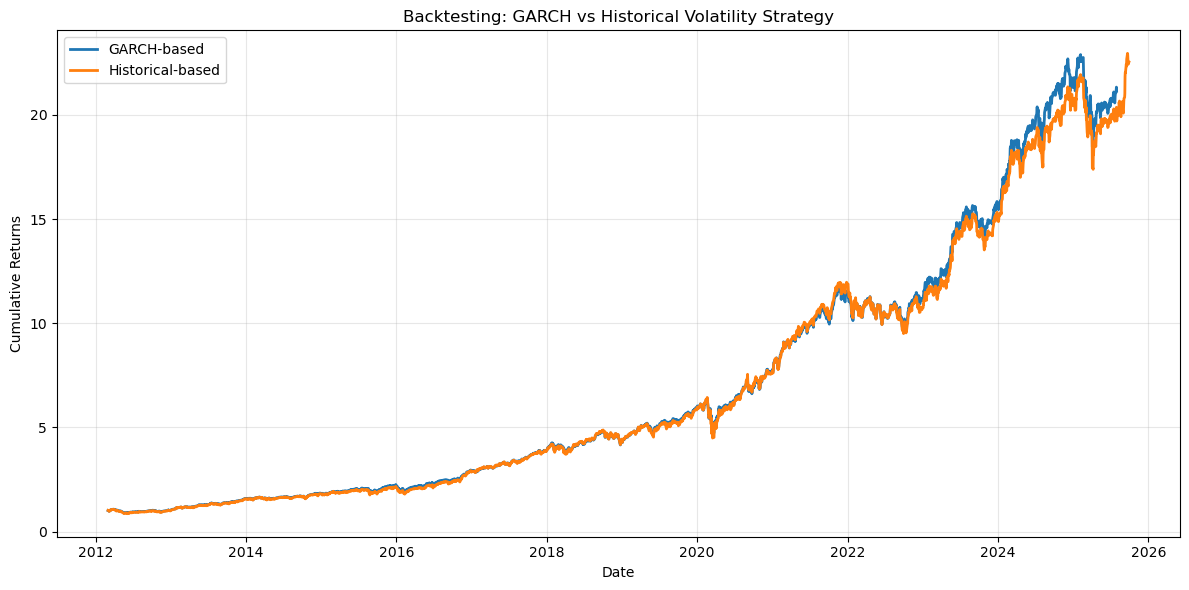

Final Cumulative Return (GARCH): 21.15
Final Cumulative Return (Historical): 22.54


In [12]:
# Convert date formats
gw['YearMonth'] = pd.to_datetime(gw['Date'], format='%m-%Y')
hw['YearMonth'] = pd.to_datetime(hw['Date'], format='%m-%Y')

# Add YearMonth to returns for mapping
returns['YearMonth'] = returns['Date'].dt.to_period('M').dt.to_timestamp()

# Get stock columns (exclude Date columns)
stock_cols = [col for col in returns.columns if col not in ['Date', 'YearMonth']]

# Merge weights with returns
returns_garch = returns.merge(gw[['YearMonth'] + stock_cols], on='YearMonth', suffixes=('_ret', '_wt'))
returns_hist = returns.merge(hw[['YearMonth'] + stock_cols], on='YearMonth', suffixes=('_ret', '_wt'))

# Calculate daily portfolio returns
garch_daily_returns = sum(returns_garch[f'{stock}_ret'] * returns_garch[f'{stock}_wt'] for stock in stock_cols)
hist_daily_returns = sum(returns_hist[f'{stock}_ret'] * returns_hist[f'{stock}_wt'] for stock in stock_cols)

# Calculate cumulative returns
garch_cumulative = (1 + garch_daily_returns).cumprod()
hist_cumulative = (1 + hist_daily_returns).cumprod()

# Plot using Date from merged dataframe
plt.figure(figsize=(12, 6))
plt.plot(returns_garch['Date'], garch_cumulative, label='GARCH-based', linewidth=2)
plt.plot(returns_hist['Date'], hist_cumulative, label='Historical-based', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Backtesting: GARCH vs Historical Volatility Strategy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final Cumulative Return (GARCH): {garch_cumulative.iloc[-1]:.2f}")
print(f"Final Cumulative Return (Historical): {hist_cumulative.iloc[-1]:.2f}")

In [14]:
# Transaction cost per rebalance (monthly)
transaction_cost = 0.0012  # 0.12% per month

# Add Year and Month columns to merged dataframes
returns_garch['Year'] = returns_garch['Date'].dt.year
returns_garch['Month'] = returns_garch['Date'].dt.to_period('M')
returns_hist['Year'] = returns_hist['Date'].dt.year
returns_hist['Month'] = returns_hist['Date'].dt.to_period('M')

# Apply transaction costs: subtract cost on first day of each month
garch_daily_returns_adj = garch_daily_returns.copy()
hist_daily_returns_adj = hist_daily_returns.copy()

# Identify first trading day of each month
first_days_garch = returns_garch.groupby('Month').first().index
first_days_hist = returns_hist.groupby('Month').first().index

# Subtract transaction cost on rebalancing days
for month in first_days_garch:
    mask = returns_garch['Month'] == month
    first_idx = mask.idxmax()
    garch_daily_returns_adj.iloc[first_idx] -= transaction_cost

for month in first_days_hist:
    mask = returns_hist['Month'] == month
    first_idx = mask.idxmax()
    hist_daily_returns_adj.iloc[first_idx] -= transaction_cost

# Function to calculate metrics - FIXED VERSION
def calculate_metrics(daily_returns, year_column):
    year_returns = daily_returns[year_column == year_column.iloc[0]]  # Filter by year
    
    # Annualized return
    total_return = (1 + year_returns).prod() - 1
    
    # Volatility (annualized)
    volatility = year_returns.std() * np.sqrt(252)
    
    # Sharpe Ratio (assuming risk-free rate = 0)
    mean_return = year_returns.mean() * 252
    sharpe = mean_return / volatility if volatility != 0 else 0
    
    # Maximum Drawdown
    cumulative = (1 + year_returns).cumprod()
    running_max = cumulative.cummax()
    drawdown = (cumulative - running_max) / running_max
    max_drawdown = drawdown.min()
    
    return {
        'Year': year_column.iloc[0],
        'Sharpe Ratio': sharpe,
        'Max Drawdown': max_drawdown,
        'Volatility': volatility
    }

# Better approach: Calculate for all years with adjusted returns
years = range(2012, 2026)

garch_metrics = []
for year in years:
    year_mask = returns_garch['Year'] == year
    if year_mask.any():
        year_data = garch_daily_returns_adj[year_mask]
        metrics = calculate_metrics(year_data, returns_garch.loc[year_mask, 'Year'])
        garch_metrics.append(metrics)

hist_metrics = []
for year in years:
    year_mask = returns_hist['Year'] == year
    if year_mask.any():
        year_data = hist_daily_returns_adj[year_mask]
        metrics = calculate_metrics(year_data, returns_hist.loc[year_mask, 'Year'])
        hist_metrics.append(metrics)

# Create DataFrames
garch_df = pd.DataFrame(garch_metrics)
hist_df = pd.DataFrame(hist_metrics)

In [15]:
garch_df

,Year,Sharpe Ratio,Max Drawdown,Volatility
0,2012,0.158906,-0.184459,0.158806
1,2013,3.088181,-0.062868,0.142026
2,2014,0.929906,-0.075598,0.138400
3,2015,1.116905,-0.128890,0.177832
4,2016,1.606287,-0.124784,0.160812
5,2017,2.503681,-0.046236,0.116753
6,2018,0.721811,-0.142677,0.188803
7,2019,1.925818,-0.110555,0.149671
8,2020,0.967216,-0.255604,0.318362
9,2021,2.378939,-0.071724,0.161896


In [16]:
hist_df

,Year,Sharpe Ratio,Max Drawdown,Volatility
0,2012,0.041545,-0.203197,0.166745
1,2013,3.020927,-0.063939,0.146762
2,2014,0.889217,-0.081588,0.143300
3,2015,0.960572,-0.136627,0.178161
4,2016,1.729946,-0.134860,0.169776
5,2017,2.431554,-0.058584,0.120442
6,2018,0.761276,-0.146750,0.195670
7,2019,1.728397,-0.125362,0.159436
8,2020,0.893174,-0.303720,0.365974
9,2021,2.534685,-0.069560,0.169316


In [17]:
# Function to calculate metrics for entire period
def calculate_overall_metrics(daily_returns):
    # Annualized return
    total_return = (1 + daily_returns).prod() - 1
    n_years = len(daily_returns) / 252
    annualized_return = (1 + total_return) ** (1/n_years) - 1
    
    # Volatility (annualized)
    volatility = daily_returns.std() * np.sqrt(252)
    
    # Sharpe Ratio (assuming risk-free rate = 0)
    sharpe = annualized_return / volatility if volatility != 0 else 0
    
    # Maximum Drawdown
    cumulative = (1 + daily_returns).cumprod()
    running_max = cumulative.cummax()
    drawdown = (cumulative - running_max) / running_max
    max_drawdown = drawdown.min()
    
    return {
        'Strategy': '',
        'Annualized Return': annualized_return,
        'Sharpe Ratio': sharpe,
        'Max Drawdown': max_drawdown,
        'Volatility': volatility
    }

# Calculate overall metrics with adjusted returns (after transaction costs)
garch_overall = calculate_overall_metrics(garch_daily_returns_adj)
garch_overall['Strategy'] = 'GARCH'

hist_overall = calculate_overall_metrics(hist_daily_returns_adj)
hist_overall['Strategy'] = 'Historical'

# Create DataFrame
overall_df = pd.DataFrame([garch_overall, hist_overall])

In [18]:
print("\nOverall Performance Metrics (After Transaction Costs):")
overall_df.round(4)


Overall Performance Metrics (After Transaction Costs):


,Strategy,Annualized Return,Sharpe Ratio,Max Drawdown,Volatility
0,GARCH,0.2380,1.3266,-0.2556,0.1794
1,Historical,0.2404,1.2551,-0.3037,0.1916
